# Kernelized Percetron - # CPTS570 Machine Learning
## Ricardo Rivero - WSU ID 11843796

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras._tf_keras.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Iteration 1 /50
Iteration 2 /50
Iteration 3 /50
Iteration 4 /50
Iteration 5 /50


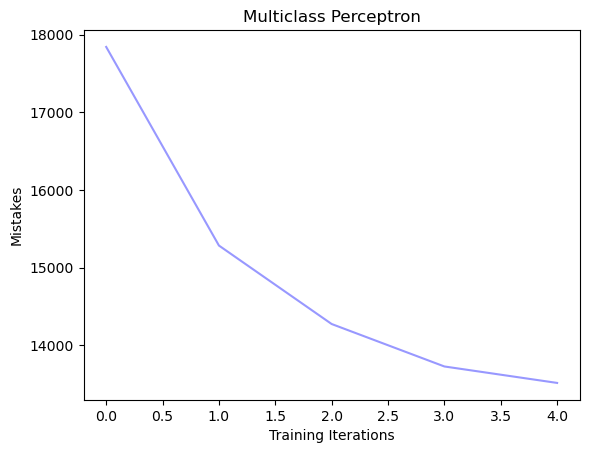

In [67]:
# Standard Perceptron
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

def weightupdate_perc(weight, xt, y, yt):
    weight[yt] += xt  # Increase weights for the true class
    weight[y] -= xt   # Decrease weights for the predicted class
    return weight

def prediction(xt, weight):
    scores = np.dot(weight, xt)  # weight shape: (10, number of samples), xt shape: (number of samples,)
    y_pred = np.argmax(scores)
    return y_pred
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_result = np.array([], dtype=object)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test_scaled = scaler.transform(x_test.reshape(x_test.shape[0], -1))

# Initialize weight with correct shape and data type
weight = np.zeros((10, len(x_train_scaled)), dtype=np.float64)

for i in range(5):
    mistakes = 0
    for j in range(len(x_train_scaled)):
        new_x = polynomial_kernel(x_train_scaled[j], x_train_scaled.T).astype(np.float64)
        y = prediction(new_x, weight)
        if y != y_train[j]:
            mistakes += 1
            weight = weightupdate_perc(weight, new_x, y, y_train[j])
    print('Iteration', i+1, '/50')
    x_result = np.insert(x_result, i, mistakes)

plt.title("Multiclass Perceptron")
plt.xlabel('Training Iterations')
plt.ylabel('Mistakes')
plt.plot([i for i in range(5)], x_result, color='#9898FF')
#plt.savefig('Multiclass_Perceptron_Mistakes.png', dpi=300)
plt.show()

Iteration 1 /5
Iteration 2 /5
Iteration 3 /5
Iteration 4 /5
Iteration 5 /5


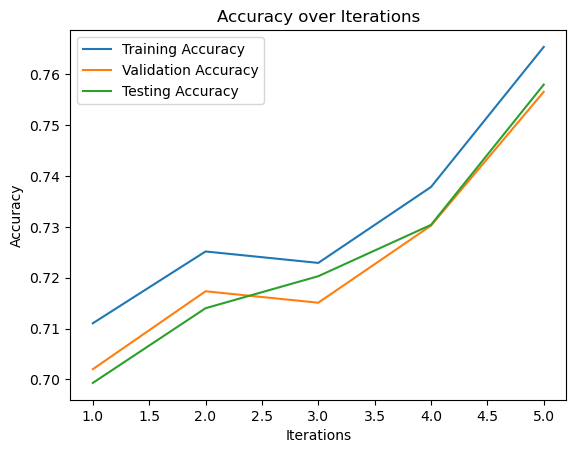

In [68]:
from sklearn.model_selection import train_test_split

# Standard Perceptron
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

def weightupdate_perc(weight, xt, y, yt):
    weight[yt] += xt  # Increase weights for the true class
    weight[y] -= xt   # Decrease weights for the predicted class
    return weight

def prediction(xt, weight):
    scores = np.dot(weight, xt)  # weight shape: (10, number of samples), xt shape: (number of samples,)
    y_pred = np.argmax(scores)
    return y_pred

def compute_accuracy(X, y, x_train, weight):
    correct = 0
    for i in range(len(X)):
        new_x = polynomial_kernel(X[i], x_train.T).astype(np.float64)
        y_pred = prediction(new_x, weight)
        if y_pred == y[i]:
            correct +=1
    accuracy = correct / len(X)
    return accuracy

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_result = np.array([], dtype=object)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test_scaled = scaler.transform(x_test.reshape(x_test.shape[0], -1))

# Split the training data into training and validation sets (80:20 proportion)
x_train_scaled_train, x_val_scaled, y_train_train, y_val = train_test_split(
    x_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize weight with correct shape and data type
weight = np.zeros((10, len(x_train_scaled_train)), dtype=np.float64)

# Initialize lists to store accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

for i in range(5):
    mistakes = 0
    for j in range(len(x_train_scaled_train)):
        new_x = polynomial_kernel(x_train_scaled_train[j], x_train_scaled_train.T).astype(np.float64)
        y = prediction(new_x, weight)
        if y != y_train_train[j]:
            mistakes += 1
            weight = weightupdate_perc(weight, new_x, y, y_train_train[j])
    print('Iteration', i+1, '/5')
    x_result = np.insert(x_result, i, mistakes)

    # Compute accuracies
    train_accuracy = compute_accuracy(x_train_scaled_train, y_train_train, x_train_scaled_train, weight)
    val_accuracy = compute_accuracy(x_val_scaled, y_val, x_train_scaled_train, weight)
    test_accuracy = compute_accuracy(x_test_scaled, y_test, x_train_scaled_train, weight)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracies over iterations
iterations = [i+1 for i in range(5)]
plt.figure()
plt.title("Accuracy over Iterations")
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.plot(iterations, test_accuracies, label='Testing Accuracy')
plt.legend()
plt.savefig('Multiclass_kernelized_Perceptron_Accuracy.png', dpi=300)
plt.show()